In [219]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from scipy.stats import zscore 
from sklearn.metrics import silhouette_score 
import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [220]:
df1 =pd.read_csv('Datasets/IPL/Batsman3-stats.csv')
df1.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KLRahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [221]:
df1 = df1.drop('POS', axis=1)

In [216]:
print("Batting Data Info:")
df1.info()
print("\nDuplicated rows in Batting Data:", df1[df1.duplicated()].shape[0])

Batting Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  100 non-null    object 
 1   Mat     100 non-null    int64  
 2   Inns    100 non-null    int64  
 3   NO      100 non-null    int64  
 4   Runs    100 non-null    int64  
 5   HS      100 non-null    object 
 6   Avg     100 non-null    object 
 7   BF      100 non-null    int64  
 8   SR      100 non-null    float64
 9   100     100 non-null    int64  
 10  50      100 non-null    int64  
 11  4s      100 non-null    int64  
 12  6s      100 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 10.3+ KB

Duplicated rows in Batting Data: 0


In [222]:
df1.shape
print(f"The batting dataset has {df1.shape[0]} rows, and {df1.shape[1]} columns.")

The batting dataset has 100 rows, and 13 columns.


In [223]:
df1 = df1.reset_index(drop=True)

In [224]:
df1.head()

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [225]:
df1.isna().sum()

PLAYER    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [226]:
df1=df1.dropna(axis=0)

In [227]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,100.0,10.3400,4.528741,1.00,7.000,11.500,14.0000,17.00
Inns,100.0,8.2600,4.758024,1.00,3.750,8.000,12.0000,17.00
NO,100.0,1.8700,1.618423,0.00,1.000,1.500,3.0000,7.00
Runs,100.0,184.0100,170.654207,10.00,33.750,115.000,312.5000,670.00
BF,100.0,138.8700,124.287680,8.00,29.750,95.500,236.2500,518.00
SR,100.0,124.9233,26.458145,57.14,110.985,126.445,140.5625,191.42
100,100.0,0.0500,0.261116,0.00,0.000,0.000,0.0000,2.00
50,100.0,1.1000,1.459902,0.00,0.000,0.000,2.0000,5.00
4s,100.0,15.8000,16.096929,0.00,3.000,9.000,27.0000,67.00
6s,100.0,7.3200,7.723609,0.00,1.000,5.000,12.0000,30.00


## BATTING DATA

Now we are going to Visualize and compare the runs scored by the top 10 players in our batting dataset.

In [228]:
df1.head()

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [229]:
df1.rename(columns={
    'PLAYER': 'Player',
    'Mat': 'Matches',
    'Inns': 'Inns',
    'NO': 'No',
    'Runs': 'Runs',
    'HS': 'Hs',
    'Avg': 'Avg',
    'BF': 'BF',
    'SR': 'Strikerate',
    '100': '100',
    '50': '50',
    '4s': '4s',
    '6s': '6s'
}, inplace=True)
df1.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s
0,KLRahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


Text(0.5, 1.0, 'Top 10 Players by Runs')

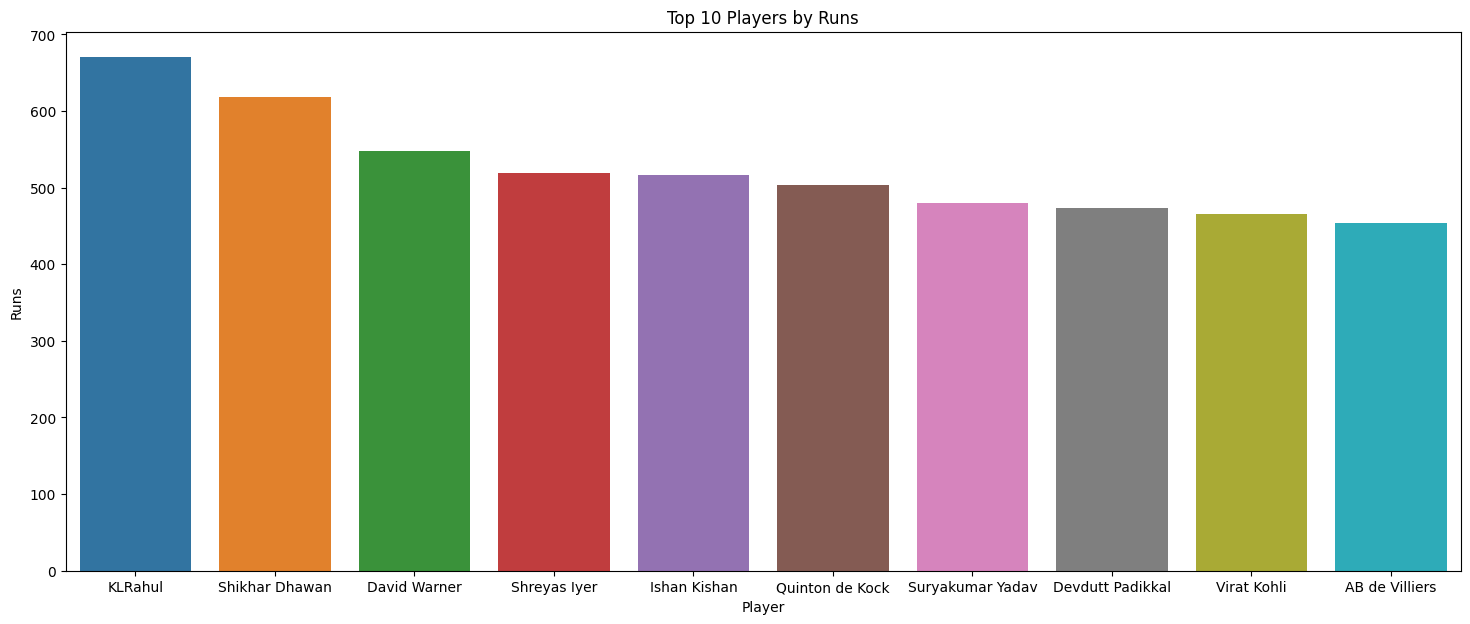

In [230]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Runs']
sns.barplot(data= b1 , x= 'Player' , y ='Runs')
plt.title("Top 10 Players by Runs")

Now we are going to Visualize and compare the Strike-rate by the top 10 players in our dataset.

Text(0.5, 1.0, 'Top 10 players by Strike Rate')

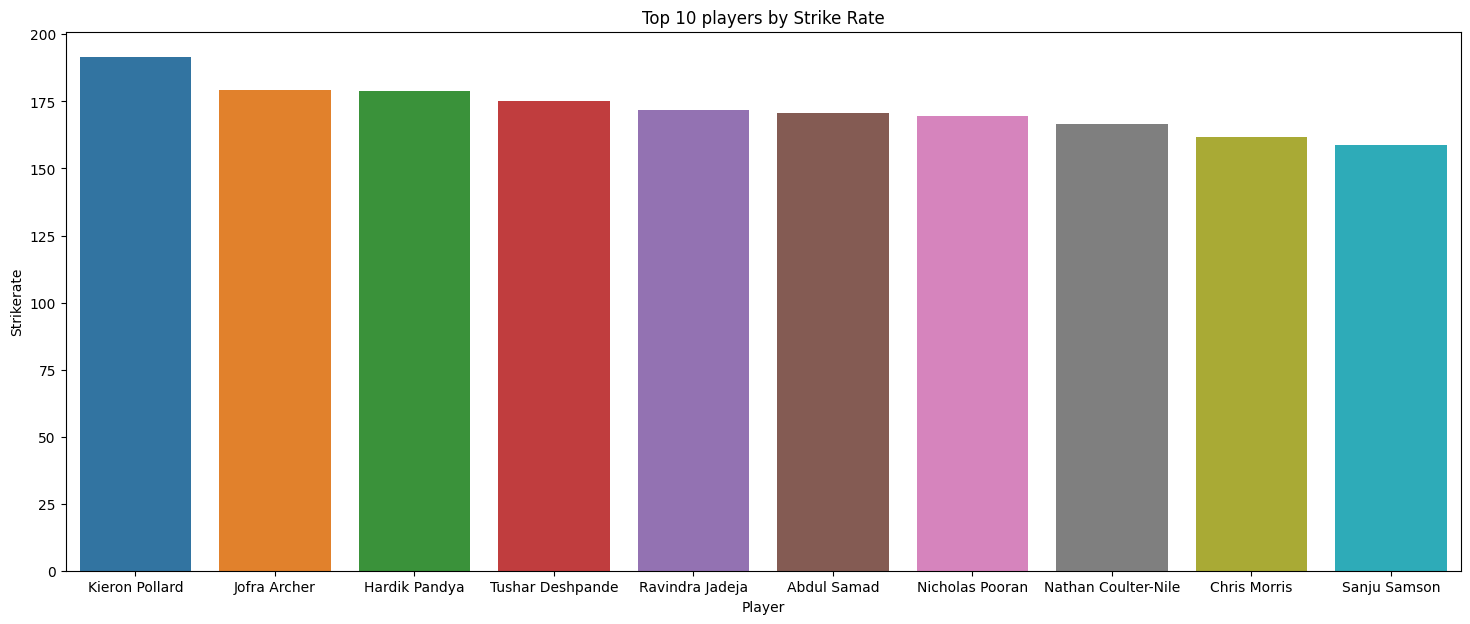

In [231]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['Strikerate'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Strikerate']
sns.barplot(data= b1 , x= 'Player' , y ='Strikerate')
plt.title("Top 10 players by Strike Rate")

Now we are going to Visualize and compare the No Of Fours scored by the top 10 players in our batting dataset.

Text(0.5, 1.0, 'Top 10 players by Fours')

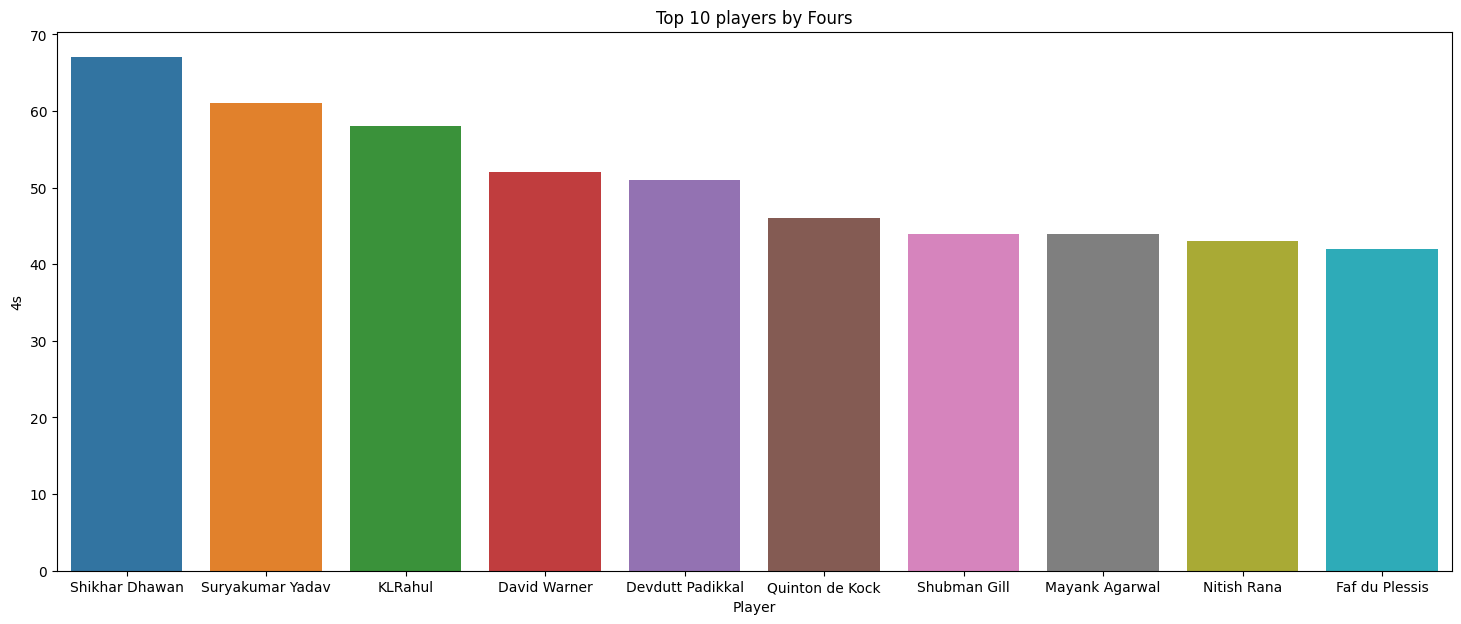

In [232]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['4s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'4s']
sns.barplot(data= b1 , x= 'Player' , y ='4s')
plt.title("Top 10 players by Fours")

Now we are going to Visualize and compare the No Of Sixes scored by the top 10 players in our batting dataset.

Text(0.5, 1.0, 'Top 10 players by Sixes')

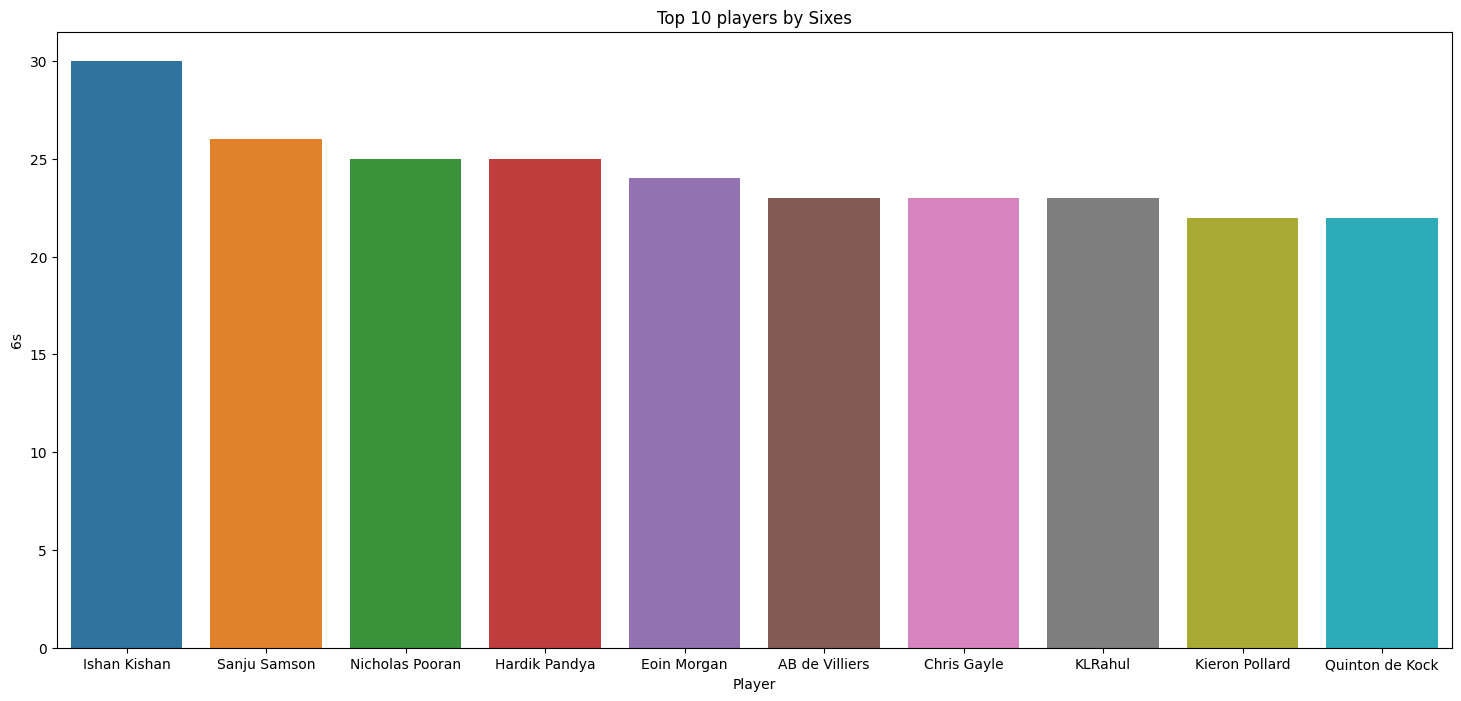

In [233]:
plt.figure(figsize=(18,8))
b1=df1.groupby('Player')['6s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'6s']
sns.barplot(data= b1 , x= 'Player' , y ='6s')
plt.title("Top 10 players by Sixes")

we are Creating histograms for each numeric column in the DataFrame df1.

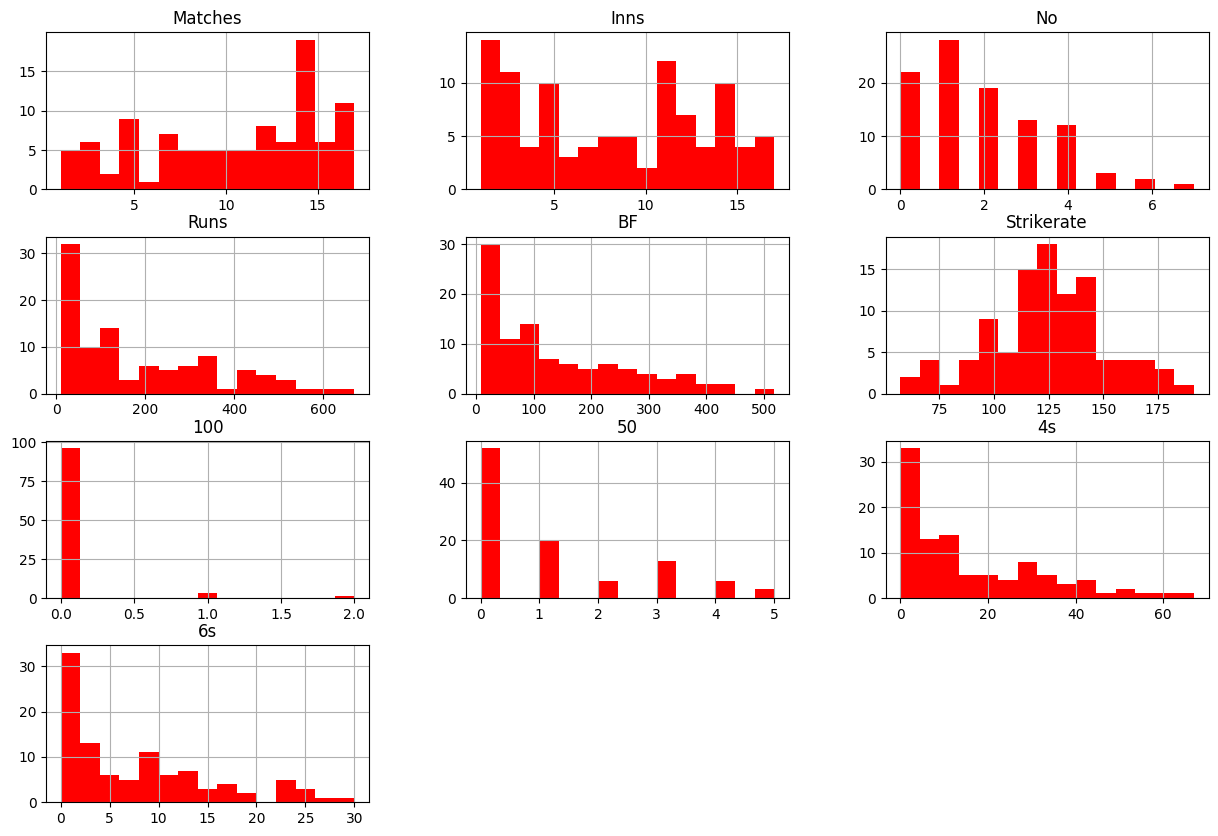

In [234]:
df1.hist(bins = 15, figsize = (15, 10), color = 'r')
plt.show()

In [235]:
df1.dtypes

Player         object
Matches         int64
Inns            int64
No              int64
Runs            int64
Hs             object
Avg            object
BF              int64
Strikerate    float64
100             int64
50              int64
4s              int64
6s              int64
dtype: object

In [236]:
df1['Hs'] = df1['Hs'].str.replace('*', '').astype(int)
df1.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88,34.6,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [237]:
df1['Avg'] = df1['Avg'].astype(str)
mask = df1['Avg'] == '-'
# print(mask)
for index, row in df1.loc[mask].iterrows():
    inns_minus_no = row['Inns'] - row['No']
    if inns_minus_no != 0:
        df1.at[index, 'Avg'] = row['Runs'] / inns_minus_no
    else:
        df1.at[index, 'Avg'] = row['Runs']

df1['Avg'] = df1['Avg'].astype(float)   
        


In [238]:
df1.tail()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s
95,Moeen Ali,3,3,0,12,11,4.0,16,75.00,0,0,1,0
96,Sandeep Sharma,13,5,3,12,9,6.0,15,80.00,0,0,1,0
97,Mohammad Nabi,1,1,1,11,11,11.0,8,137.50,0,0,2,0
98,Rinku Singh,1,1,0,11,11,11.0,11,100.00,0,0,1,0
99,Shivam Mavi,8,3,1,10,9,5.0,14,71.42,0,0,1,0


[Text(0.5, 1.0, 'Distribution of Balls faced')]

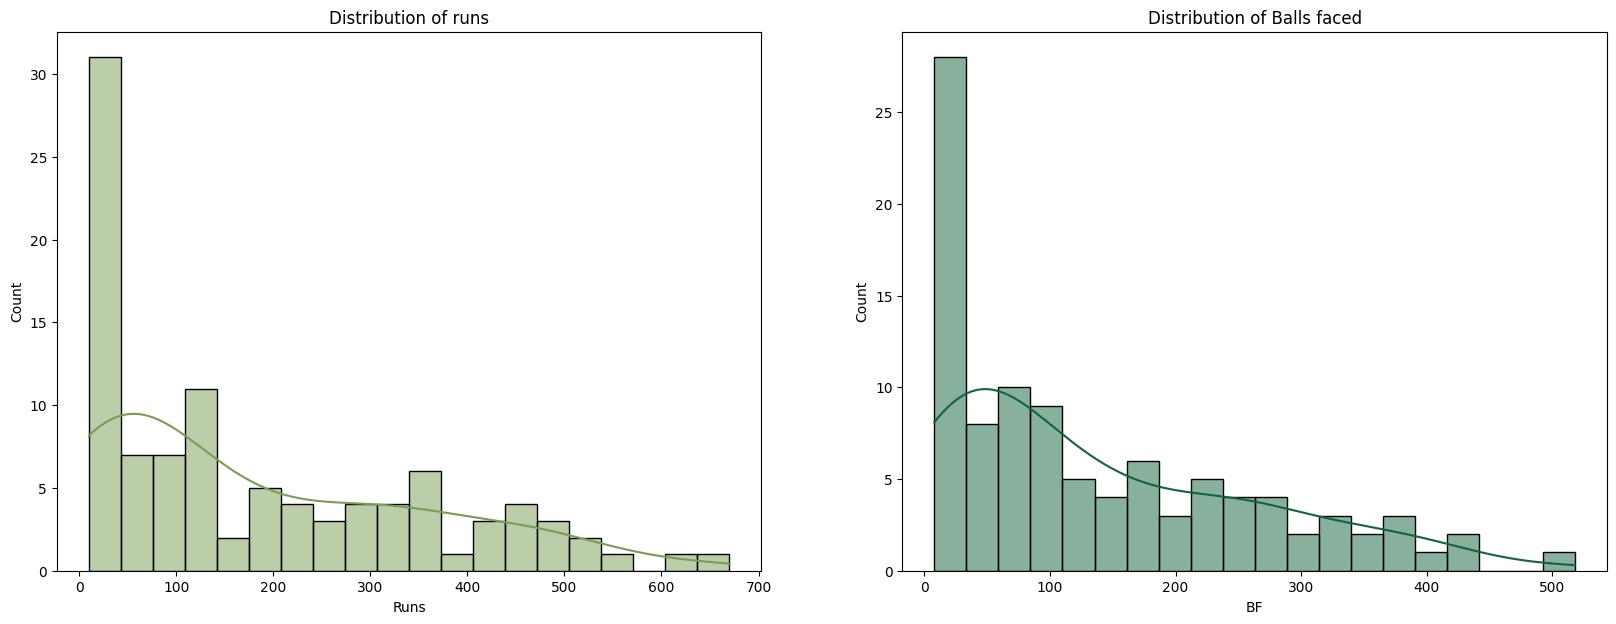

In [239]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["Runs"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of runs")

sns.histplot(ax = axes[1], x = df1["BF"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Balls faced")


[Text(0.5, 1.0, 'Distribution of sixes')]

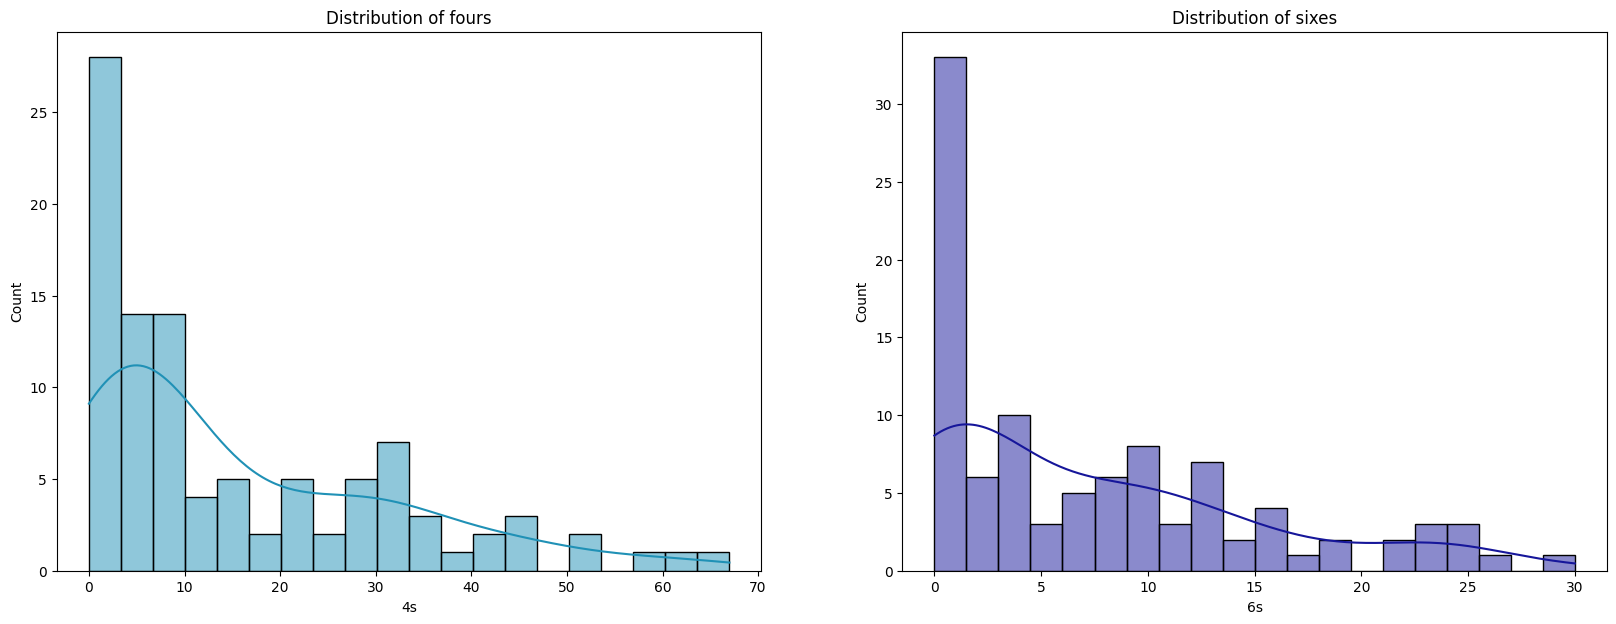

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["4s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of fours")

sns.histplot(ax = axes[1], x = df1["6s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of sixes")

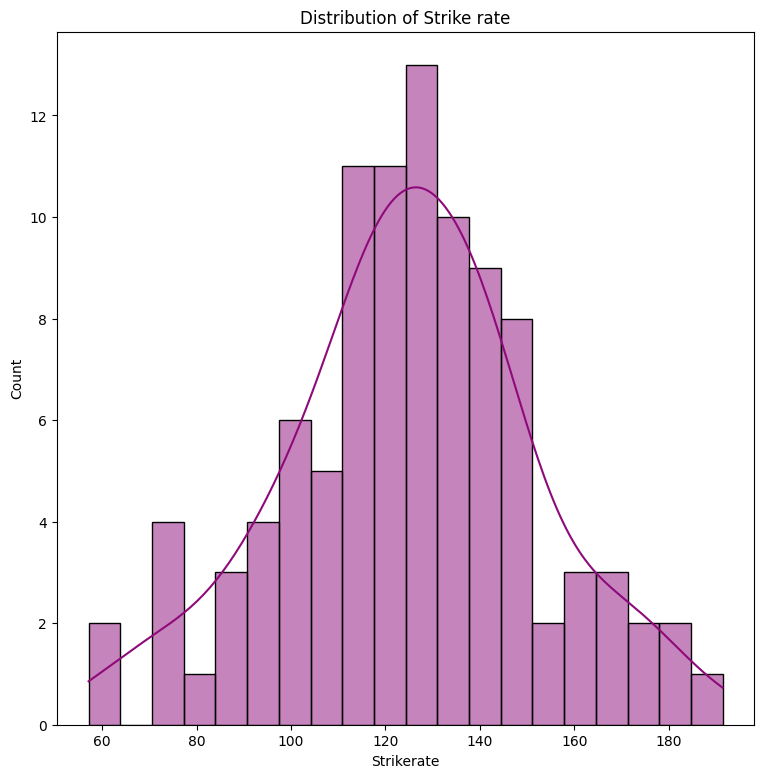

In [240]:
plt.figure(figsize=(9, 9))  

sns.histplot(df1["Strikerate"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Strike rate")
plt.show()


In [241]:
def remove_outliers_iqr(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]


df= remove_outliers_iqr(df1)

### The outliers are genuine observations, especially in the context of sports performance data, these are crucial for accurate analysis and insights.

In [242]:
pre_processed_data_ipl_bat = df1.to_csv('Datasets/IPL/pre_processed_data_ipl_bat.csv', index=False)


In [243]:
selected_columns = ['Player', 'Inns', 'Runs', 'Avg','Strikerate', '4s','6s']

pre_processed_data_ipl_bat = df1[selected_columns]

## Correlation

<AxesSubplot: >

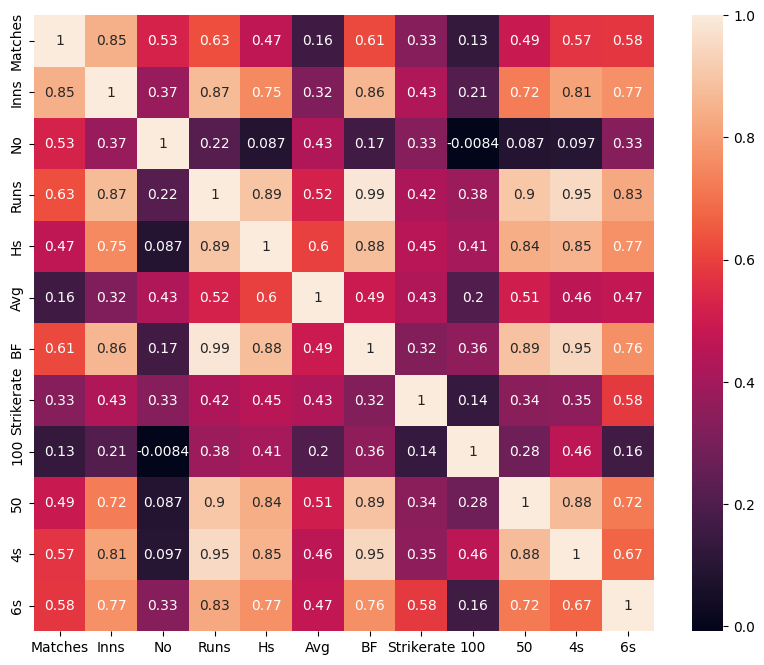

In [181]:
plt.figure(figsize=(10,8))
corr=df1.drop(columns='Player').corr()
sns.heatmap(corr,annot=True)

## K-MEANS Implementation

In [182]:
df1.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [183]:
# desired_order = ['Matches', 'Inns', 'No', 'Runs', 'BF', 'Strikerate', 'Avg', '4s', '6s', '100', '50', 'Hs']
# df = df[desired_order]
# df.head()

In [184]:
from sklearn.preprocessing import StandardScaler

cc = df1.iloc[:,[4,5,7,8,11,12]]
scaler = StandardScaler()
scaled_data = scaler.fit(cc)
#cc = cc.apply(zscore)
cc.head()

,Runs,Hs,BF,Strikerate,4s,6s
0,670,132,518,129.34,58,23
1,618,106,427,144.73,67,12
2,548,85,407,134.64,52,14
3,519,88,421,123.27,40,16
4,516,99,354,145.76,36,30


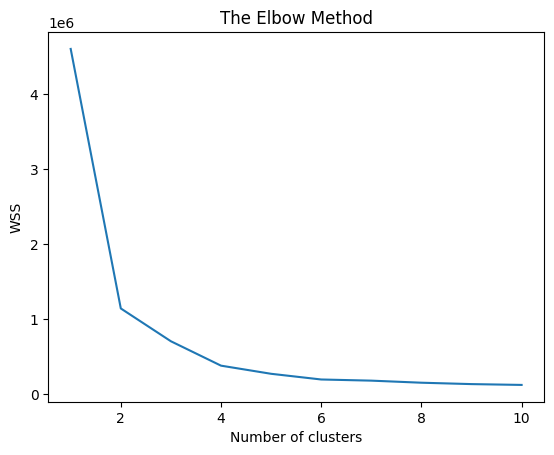

In [185]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [186]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
silhouette_score(cc,labels)


0.653091015134314

In [187]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

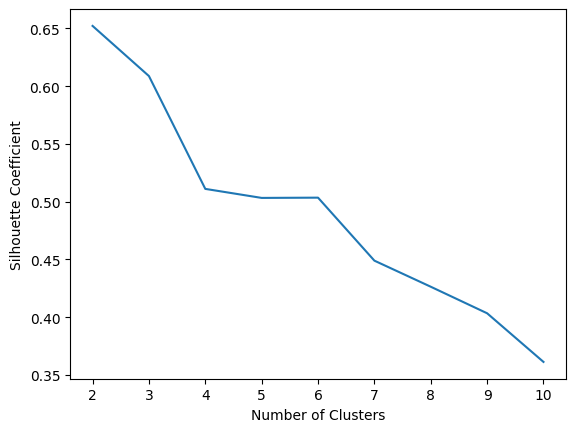

In [188]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters.

In [189]:
df1['cluster']=labels
df1.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,cluster
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,1
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,1
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,1
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,1
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,1


In [190]:
df1.cluster.value_counts().sort_index()

0    67
1    33
Name: cluster, dtype: int64

In [191]:
df1.head(10)

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,cluster
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,1
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,1
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,1
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,1
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,1
5,Quinton de Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22,1
6,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11,1
7,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8,1
8,Virat Kohli,15,15,4,466,90,42.36,384,121.35,0,3,23,11,1
9,AB de Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23,1


In [192]:
df = pd.DataFrame(df1)

desired_order = ['Matches', 'Inns', 'No', 'Runs', 'BF', 'Strikerate', 'Avg', '4s', '6s', '100', '50', 'Hs','cluster']
df = df[desired_order]
df.head()

,Matches,Inns,No,Runs,BF,Strikerate,Avg,4s,6s,100,50,Hs,cluster
0,14,14,2,670,518,129.34,55.83,58,23,1,5,132,1
1,17,17,3,618,427,144.73,44.14,67,12,2,4,106,1
2,16,16,2,548,407,134.64,39.14,52,14,0,4,85,1
3,17,17,2,519,421,123.27,34.60,40,16,0,3,88,1
4,14,13,4,516,354,145.76,57.33,36,30,0,4,99,1


In [193]:
df1['cluster'] = df1['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [194]:
Grade_A = df1[df1['cluster'] == 'Grade A']
Grade_A.head(5)

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,cluster
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,Grade A
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Grade A
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,Grade A
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,Grade A
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Grade A


In [195]:
Grade_B = df1[df1['cluster'] == 'Grade B']
Grade_B.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,cluster
33,Ravindra Jadeja,14,11,6,232,50,46.40,135,171.85,0,1,22,11,Grade B
34,Rahul Tripathi,11,11,1,230,81,23.00,181,127.07,0,1,21,10,Grade B
35,Prithvi Shaw,13,13,0,228,66,17.53,167,136.52,0,2,27,8,Grade B
36,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5,Grade B
37,Ruturaj Gaikwad,6,6,2,204,72,51.00,169,120.71,0,3,16,6,Grade B


##  HIERARCHICAL CLUSTERING

In [196]:
df1 = df1.drop(columns=['cluster'], axis=1)


In [197]:
df1.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [198]:
from sklearn.preprocessing import StandardScaler
cc = df1.iloc[:,[4,5,7,8,11,12]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cc)

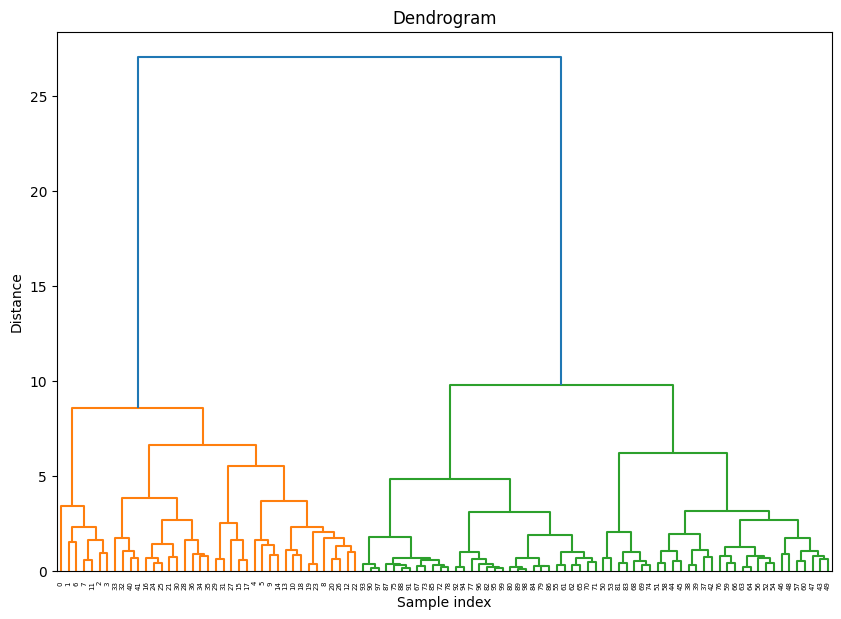

In [199]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [200]:
from sklearn.cluster import AgglomerativeClustering


num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.51


In [201]:
df1['Cluster'] = clusters
print(df1.head())


           Player  Matches  Inns  No  Runs   Hs    Avg   BF  Strikerate  100  \
0         KLRahul       14    14   2   670  132  55.83  518      129.34    1   
1  Shikhar Dhawan       17    17   3   618  106  44.14  427      144.73    2   
2    David Warner       16    16   2   548   85  39.14  407      134.64    0   
3    Shreyas Iyer       17    17   2   519   88  34.60  421      123.27    0   
4    Ishan Kishan       14    13   4   516   99  57.33  354      145.76    0   

   50  4s  6s  Cluster  
0   5  58  23        1  
1   4  67  12        1  
2   4  52  14        1  
3   3  40  16        1  
4   4  36  30        1  


In [202]:
df1['Cluster'] = df1['Cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [203]:
Grade_A = df1[df1['Cluster'] == 'Grade A']
Grade_A.head(10)

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,Cluster
0,KLRahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,Grade A
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Grade A
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,Grade A
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,Grade A
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Grade A
5,Quinton de Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22,Grade A
6,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11,Grade A
7,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8,Grade A
8,Virat Kohli,15,15,4,466,90,42.36,384,121.35,0,3,23,11,Grade A
9,AB de Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23,Grade A


In [204]:
Grade_B = df1[df1['Cluster'] == 'Grade B']
Grade_B.head()

,Player,Matches,Inns,No,Runs,Hs,Avg,BF,Strikerate,100,50,4s,6s,Cluster
37,Ruturaj Gaikwad,6,6,2,204,72,51.00,169,120.71,0,3,16,6,Grade B
38,MS Dhoni,14,12,4,200,47,25.00,172,116.27,0,0,16,7,Grade B
39,Robin Uthappa,12,12,0,196,41,16.33,164,119.51,0,0,19,7,Grade B
42,Dinesh Karthik,14,14,2,169,58,14.08,134,126.11,0,1,20,4,Grade B
43,Pat Cummins,14,11,4,146,53,20.85,114,128.07,0,1,9,8,Grade B


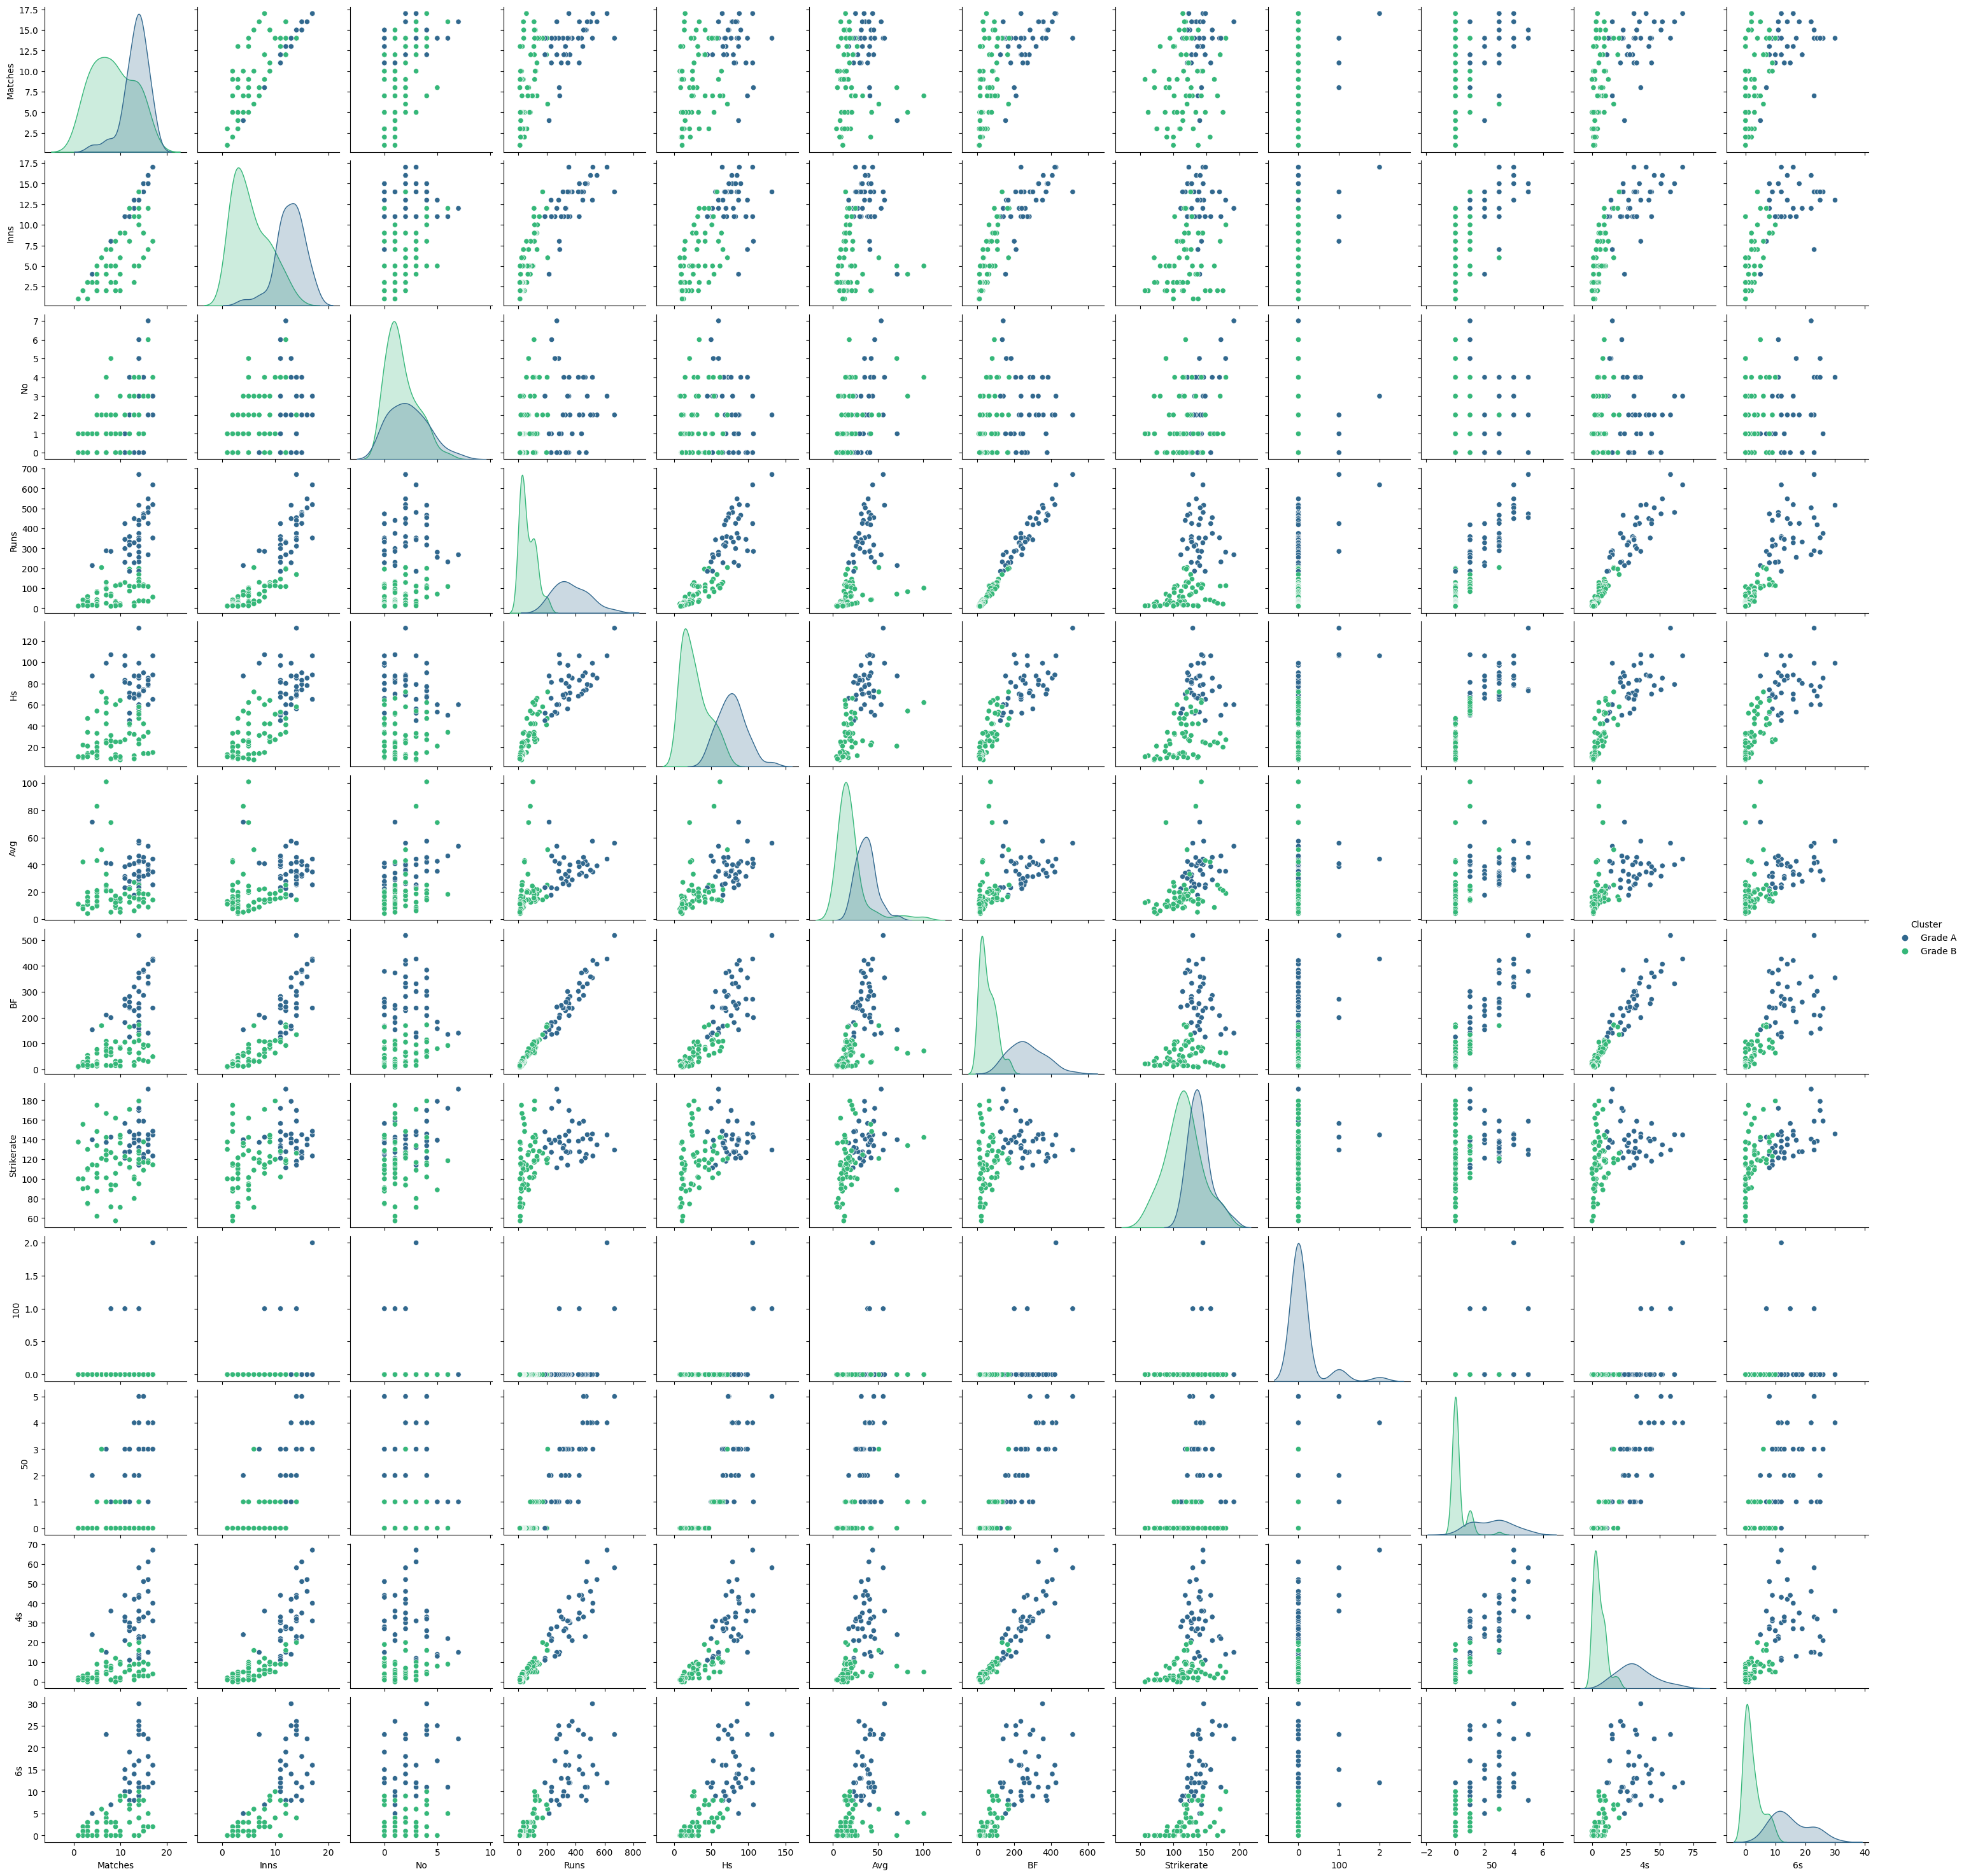

In [205]:
sns.pairplot(df1, hue='Cluster', palette='viridis')
plt.show()


# b

In [206]:
plt.figure(figsize=(18,8))
b1=df2.groupby('PLAYER')['Wickets'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['PLAYER' ,'Wickets']
sns.barplot(data= b1 , x= 'PLAYER' , y ='Wickets');
plt.title("Top 10 Players by taking Wickets");

NameError: name 'df2' is not defined

<Figure size 1800x800 with 0 Axes>

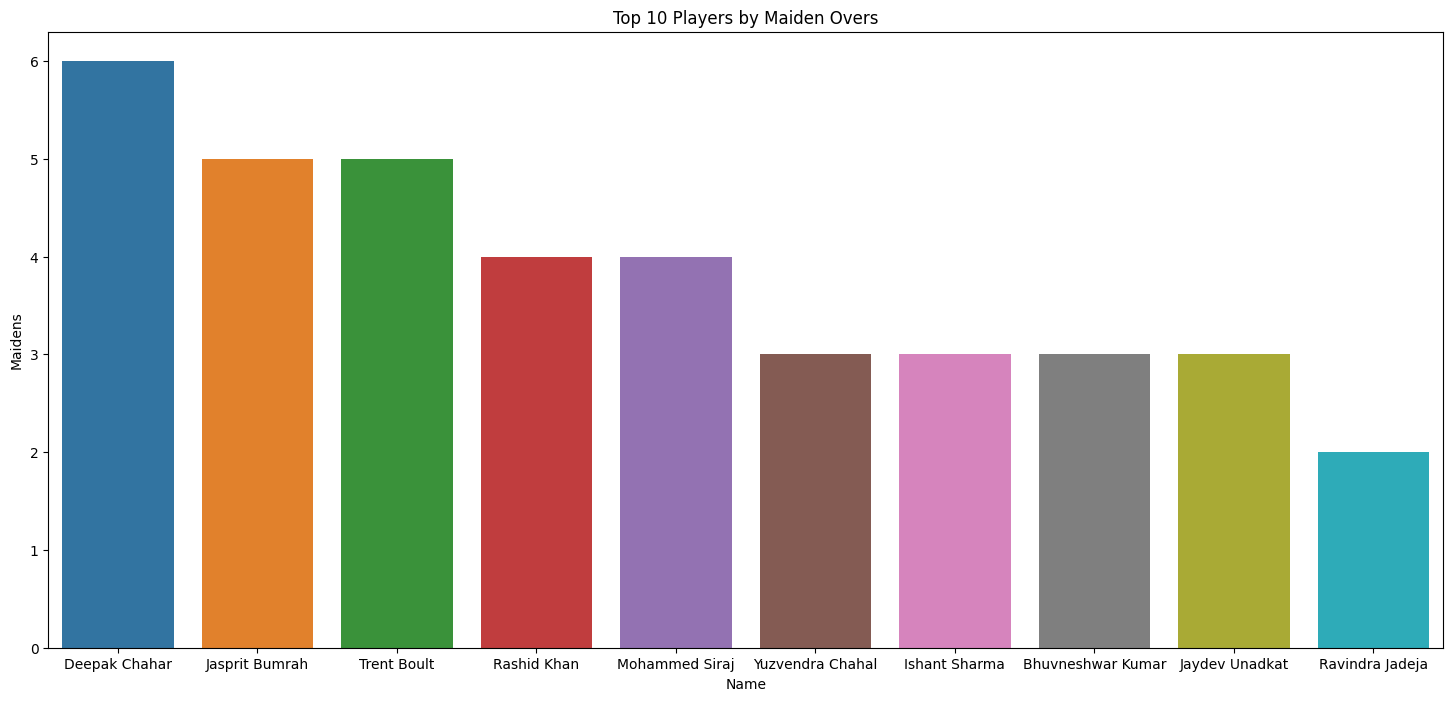

In [ ]:
plt.figure(figsize=(18,8))
b1=df2.groupby('PLAYER')['Maidens'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['PLAYER' ,'Maidens']
sns.barplot(data= b1 , x= 'PLAYER' , y ='Maidens');
plt.title("Top 10 Players by Maiden Overs");

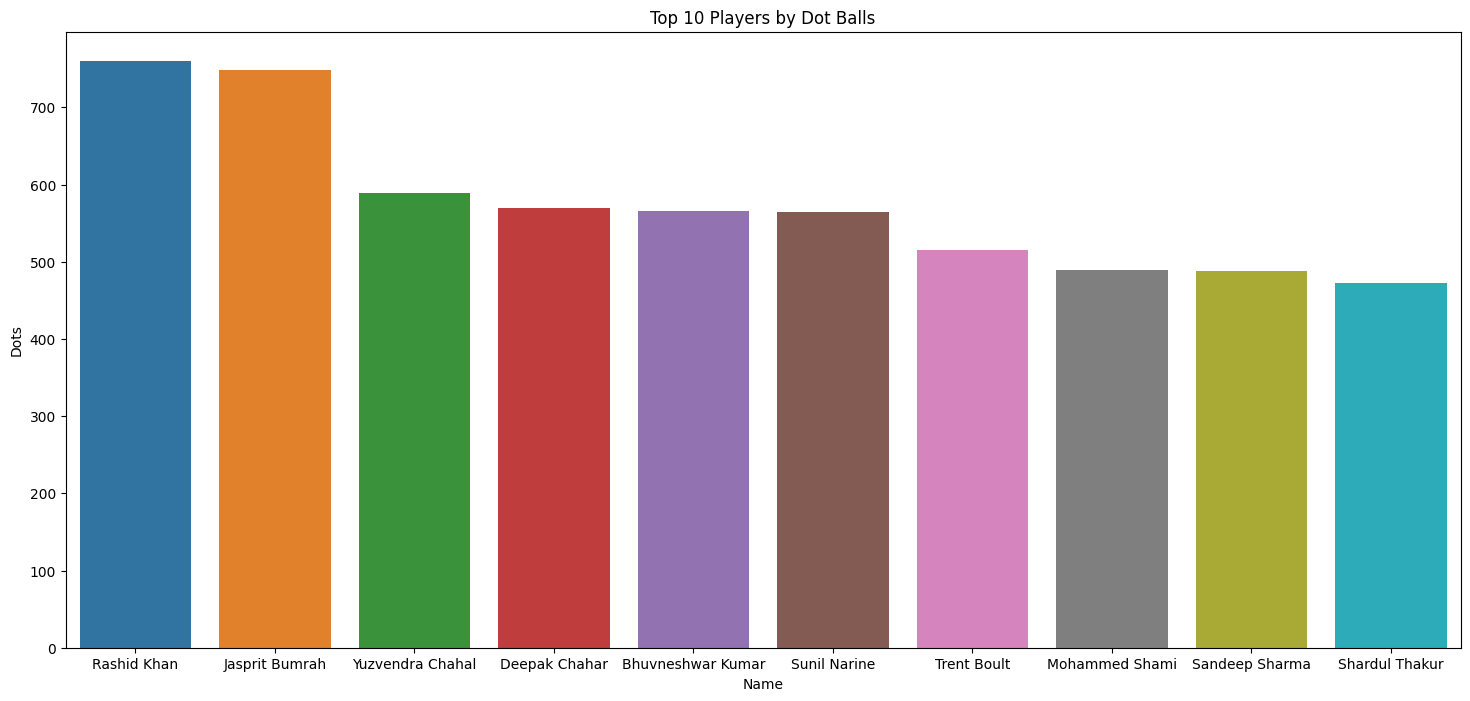

In [ ]:
plt.figure(figsize=(18,8))
b1=df2.groupby('PLAYER')['Dots'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['PLAYER' ,'Dots']
sns.barplot(data= b1 , x= 'PLAYER' , y ='Dots');
plt.title("Top 10 Players by Dot Balls");

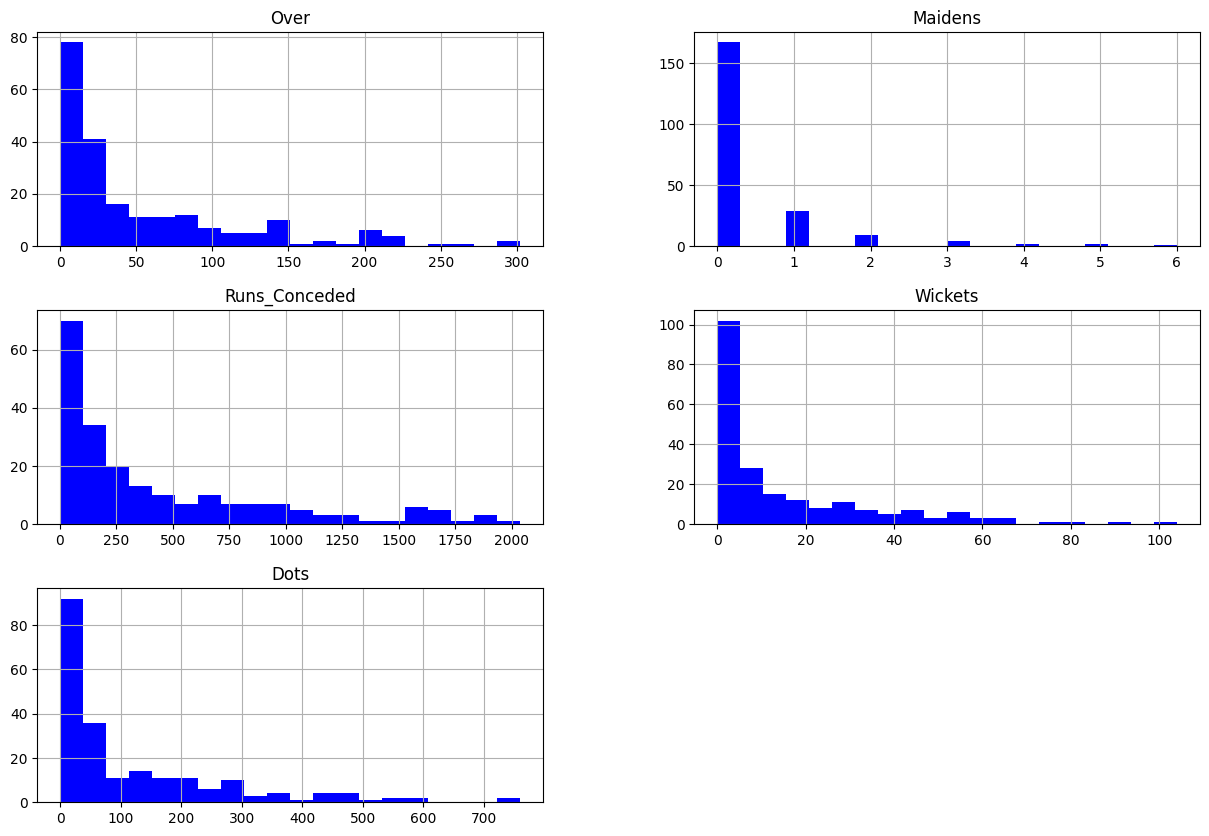

In [ ]:
df2.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

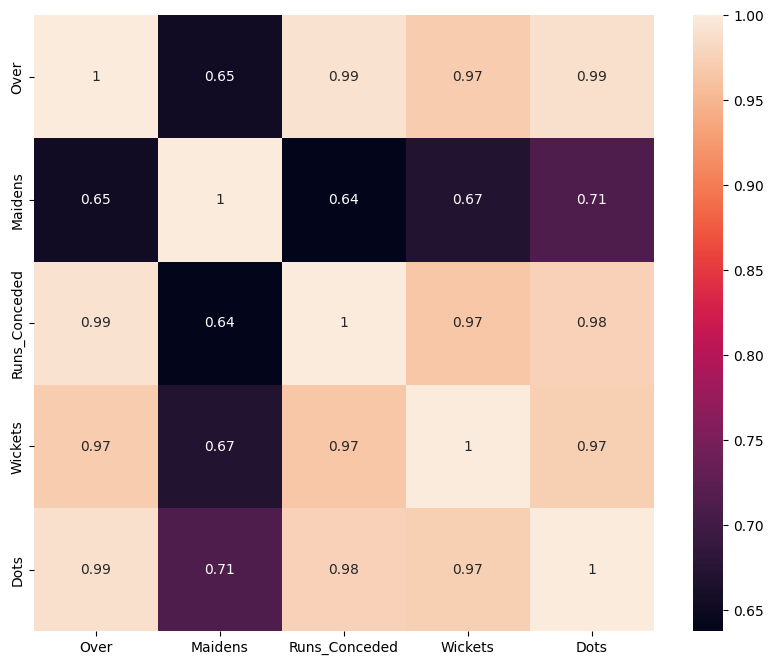

In [ ]:
plt.figure(figsize=(10,8))
corr=df2.drop(columns='PLAYER').corr()
sns.heatmap(corr,annot=True);

In [ ]:
cc = df2.iloc[:,1:6]
cc2 = cc.apply(zscore)
cc2.head()

,Over,Maidens,Runs_Conceded,Wickets,Dots
0,0.670275,-0.415119,0.656685,0.245711,0.393768
1,0.508255,1.725496,0.548349,0.499977,0.666367
2,0.405435,0.655188,0.413931,0.449124,0.526743
3,1.083113,-0.415119,0.797121,1.059361,0.998804
4,3.189369,0.655188,2.903666,2.178130,2.966835


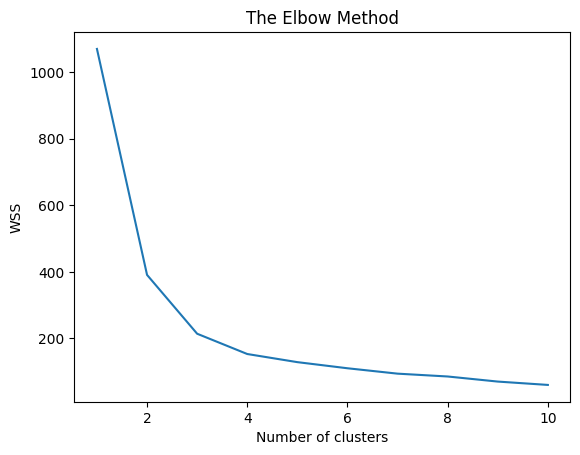

In [ ]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc2)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
silhouette_score(cc2,labels)

0.670311895480103

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc2)
    score = silhouette_score(cc2,kmeans.labels_)
    silhouette_coefficients.append(score)

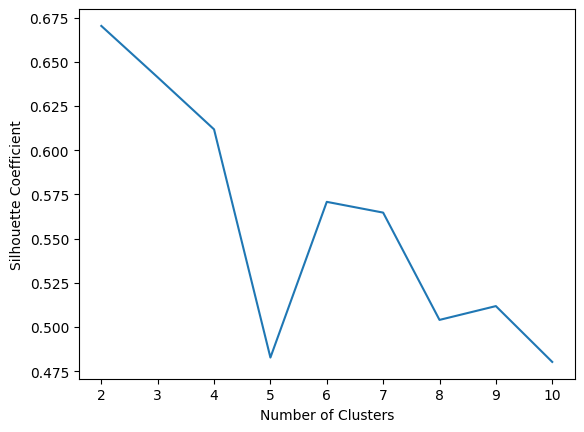

In [ ]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
df2['cluster']=labels
df2.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
0,Shakib Al Hasan,96.5,0,769,20,177,1
1,Shivam Mavi,86.1,2,715,25,218,0
2,Lockie Ferguson,79.5,1,648,24,197,1
3,Varun Chakravarthy,123.0,0,839,36,268,0
4,Sunil Narine,258.2,1,1889,58,564,0


In [ ]:
df2.cluster.value_counts().sort_index()

0     45
1    169
Name: cluster, dtype: int64

In [ ]:
df2.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
0,Shakib Al Hasan,96.5,0,769,20,177,1
1,Shivam Mavi,86.1,2,715,25,218,0
2,Lockie Ferguson,79.5,1,648,24,197,1
3,Varun Chakravarthy,123.0,0,839,36,268,0
4,Sunil Narine,258.2,1,1889,58,564,0
5,Venkatesh Iyer,8.3,0,69,3,14,1
6,Deepak Chahar,215.4,6,1681,59,570,0
7,Josh Hazlewood,45.0,0,357,12,118,1
8,Shardul Thakur,206.2,2,1829,66,472,0
9,Dwayne Bravo,148.4,1,1306,45,272,0


In [ ]:
aggdata=df2.iloc[:,0:7].groupby('cluster').mean()
aggdata['Freq']=df2.cluster.value_counts().sort_index()
aggdata

,Over,Maidens,Runs_Conceded,Wickets,Dots,Freq
cluster,,,,,,
0,159.360000,1.400000,1267.955556,46.977778,362.911111,45
1,25.281065,0.118343,221.662722,6.698225,52.502959,169


In [ ]:
df2['cluster'] = df2['cluster'].replace({1: 'Grade A', 0: 'Grade B'})